In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
clean_data = pd.read_csv('clean_data.csv')
clean_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,3,2,...,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,2,2,...,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,3,2,...,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,2,2,...,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,3,2,...,0,0,0,0,1,0,0,0,1,0


In [3]:
clean_data.columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'ExterQual', 'ExterCond',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=534)

In [4]:
y=clean_data['SalePrice']
clean_data=clean_data.drop(['SalePrice'],axis=1) #drop the y in clean_data
X = clean_data.iloc[:,1:] # drop the id column
X.shape

(1459, 532)

In [5]:
y.describe()

count      1459.000000
mean     180930.394791
std       79468.964025
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Text(0.5,1,'Distribution of y')

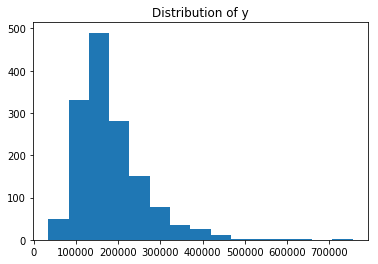

In [6]:
plt.hist(y,bins=15)
plt.title('Distribution of y')
# Basically the first and last 9 bins have little samples, 
#it's hard to predict these small groups of data,so drop it first.

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [8]:
clf = Lasso(random_state=42)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


33069.93524702181

In [9]:
# grid search to get the best hyperparameter.
from sklearn.model_selection import GridSearchCV
parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train_sc,y_train)
y_test_pred = clf.predict(X_test_sc)
y_train_pred = clf.predict(X_train_sc)


/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [10]:

mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test)

26802.87448312158

Text(0,0.5,'y_test_pred')

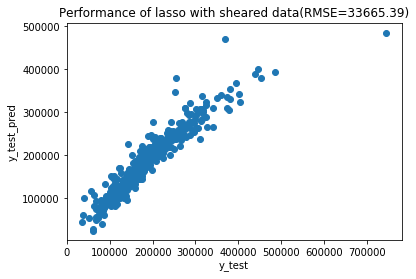

In [11]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of lasso with sheared data(RMSE=33665.39)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [12]:
clf.best_score_
# R2

0.8037315767569586

## Remove outliers in X

In [13]:
y_true_comb = np.hstack([y_train,y_test])
len(y_true_comb)

1459

In [14]:
X_true_comb = np.vstack([X_train_sc,X_test_sc])
X_true_comb = pd.DataFrame(X_true_comb,columns=X.columns)

In [15]:
y_pred = clf.predict(X_true_comb)

In [16]:
error =y_true_comb-y_pred
error

array([-14028.48554686,  18869.90785598,  31935.99323894, ...,
        20869.21771686, -35026.38340765, -29035.94844561])

Text(0.5,1,'Distribution of errors')

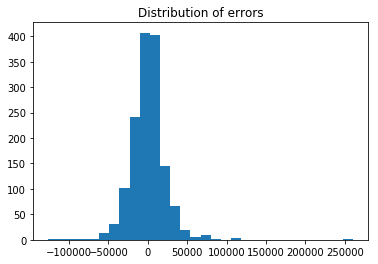

In [17]:
plt.hist(y_true_comb-y_pred,bins = 30)
plt.title('Distribution of errors')

In [18]:
strange_X = X_true_comb[error<-60000]
strange_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
700,0.052093,-1.673021,0.148034,-0.090550,1.328141,0.176179,0.492087,-0.692465,2.661743,0.577925,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,0.470417,-0.310918
1064,-0.881004,1.196449,0.191906,1.376930,-0.494482,1.197285,1.165509,2.756348,-0.217113,1.689151,...,-0.031311,-0.044302,3.236033,-0.031311,-2.540188,-0.062715,-0.076885,-0.126176,-2.125775,3.216278
1094,-0.881004,0.259479,-0.175261,-0.824290,-0.494482,-0.647293,-1.576280,-2.416871,-0.217113,-0.533302,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,13.006409,-0.126176,-2.125775,-0.310918
1152,-0.881004,0.903646,0.075925,1.376930,-0.494482,1.098468,1.021204,1.031941,-0.217113,1.689151,...,-0.031311,-0.044302,3.236033,-0.031311,-2.540188,-0.062715,-0.076885,-0.126176,-2.125775,3.216278
1167,-0.881004,1.723495,0.265211,1.376930,-0.494482,1.131407,1.021204,1.031941,-0.217113,0.577925,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,0.470417,-0.310918
1173,-0.881004,-1.673021,2.028113,-0.090550,-2.317105,-0.482598,-0.469944,1.031941,-0.217113,-0.533302,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,13.006409,-0.126176,-2.125775,-0.310918
1218,0.285367,-0.209006,-0.194760,-1.558029,-1.405794,-1.701337,-1.672484,-0.692465,-3.095969,-0.533302,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,0.470417,-0.310918
1299,-0.881004,0.230199,1.331579,-0.824290,2.239452,-0.120270,0.876900,-0.692465,-0.217113,-0.533302,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,-2.125775,3.216278


In [19]:
strange_X = X_true_comb[error>80000]
strange_X

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,ExterQual,ExterCond,BsmtQual,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
390,-0.881004,1.401411,0.442724,2.84441,-0.494482,1.197285,1.117407,2.756348,-0.217113,1.689151,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,0.470417,-0.310918
446,0.052093,1.459972,0.301082,2.11067,-0.494482,1.197285,1.165509,2.756348,-0.217113,1.689151,...,-0.031311,-0.044302,3.236033,-0.031311,-2.540188,-0.062715,-0.076885,-0.126176,-2.125775,3.216278
491,0.402004,0.962207,1.134291,2.84441,3.150764,-2.623626,0.395884,1.031941,2.661743,-0.533302,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,0.470417,-0.310918
554,-0.881004,0.083797,-0.232562,1.37693,0.416829,1.164346,1.069306,1.031941,-0.217113,0.577925,...,-0.031311,-0.044302,3.236033,-0.031311,-2.540188,-0.062715,-0.076885,-0.126176,-2.125775,3.216278
1316,0.052093,1.372131,0.266775,2.11067,-0.494482,1.197285,1.165509,2.756348,-0.217113,1.689151,...,-0.031311,-0.044302,3.236033,-0.031311,-2.540188,-0.062715,-0.076885,-0.126176,-2.125775,3.216278
1379,0.052093,3.011828,0.460384,2.84441,-0.494482,0.802018,0.540189,1.031941,-0.217113,1.689151,...,-0.031311,-0.044302,-0.309020,-0.031311,0.393672,-0.062715,-0.076885,-0.126176,-2.125775,-0.310918


Text(0,0.5,'y_test_pred')

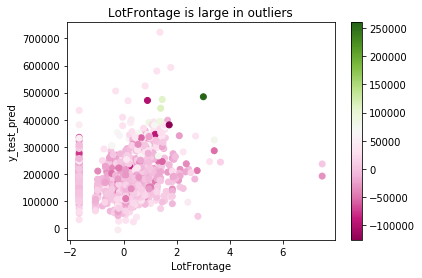

In [20]:
# identify outliers of X according to its feature
cm = plt.cm.get_cmap('PiYG')
sc = plt.scatter(X_true_comb.iloc[:,1],y_pred , c=error, cmap=cm) # LotFrontage:
                                                                    #Linear feet of street connected to property
plt.colorbar(sc)
plt.title('LotFrontage is large in outliers')
plt.xlabel('LotFrontage')
plt.ylabel('y_test_pred')

Text(0,0.5,'y_test_pred')

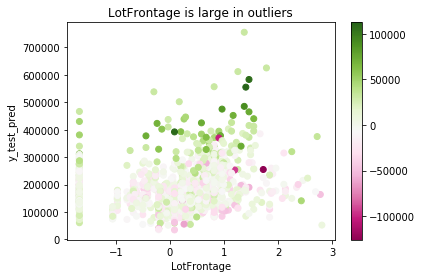

In [21]:
# remove according to LotFrontage. 
X_filted = X_true_comb[X_true_comb['LotFrontage'] < 3]
y_filted = y_true_comb[X_true_comb['LotFrontage'] < 3]
error_filted = error[X_true_comb['LotFrontage'] < 3]
cm = plt.cm.get_cmap('PiYG')
sc = plt.scatter(X_filted.iloc[:,1],y_filted , c=error_filted, cmap=cm) # LotFrontage:
                                                                    #Linear feet of street connected to property
plt.colorbar(sc)
plt.title('LotFrontage is large in outliers')
plt.xlabel('LotFrontage')
plt.ylabel('y_test_pred')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_filted, y_filted, test_size=0.3, random_state=42)
clf = Lasso(random_state=42)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


35317.15079537594

In [23]:
parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)
mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

30570.689624112565

In [24]:
y.shape[0]-y_filted.shape[0] # 7 data points removed

7

Text(0,0.5,'y_test_pred')

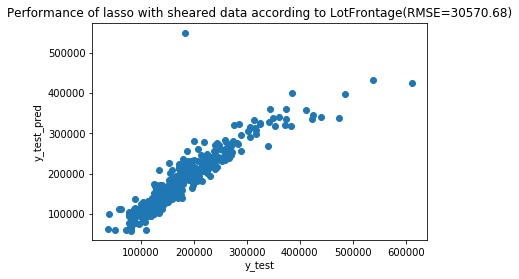

In [25]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of lasso with sheared data according to LotFrontage(RMSE=30570.68)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [26]:
# combine data for some EDA and find more outliers
y_filted = np.hstack([y_train,y_test])
X_true_comb = np.vstack([X_train,X_test])
X_filted = pd.DataFrame(X_true_comb,columns=X.columns)
y_pred = clf.predict(X_filted)
error_filted =y_filted-y_pred
error_filted

array([ 5.21606840e+03, -9.47065676e+03,  5.37606815e+03, ...,
       -1.64250998e+02, -1.62202384e+01,  1.63888821e+04])

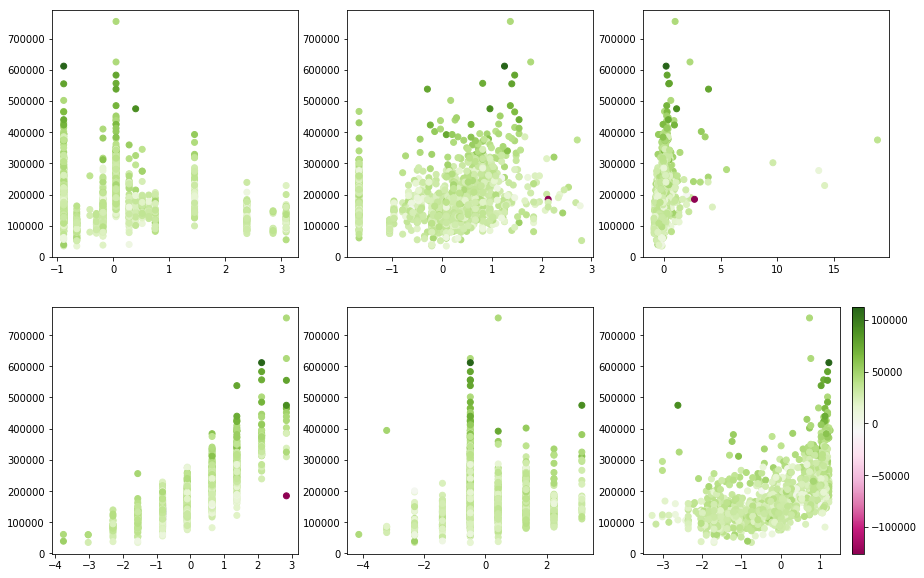

In [27]:
i = 0
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes[0, 0].scatter(X_filted.iloc[:,i+0],y_filted  , c=error_filted, cmap=cm)
axes[0, 1].scatter(X_filted.iloc[:,i+1],y_filted  , c=error_filted, cmap=cm)
axes[0, 2].scatter(X_filted.iloc[:,i+2],y_filted , c=error_filted, cmap=cm)
axes[1, 0].scatter(X_filted.iloc[:,i+3],y_filted  , c=error_filted, cmap=cm)
axes[1, 1].scatter(X_filted.iloc[:,i+4],y_filted  , c=error_filted, cmap=cm)
axes[1, 2].scatter(X_filted.iloc[:,i+5],y_filted  , c=error_filted, cmap=cm)
plt.colorbar(sc)

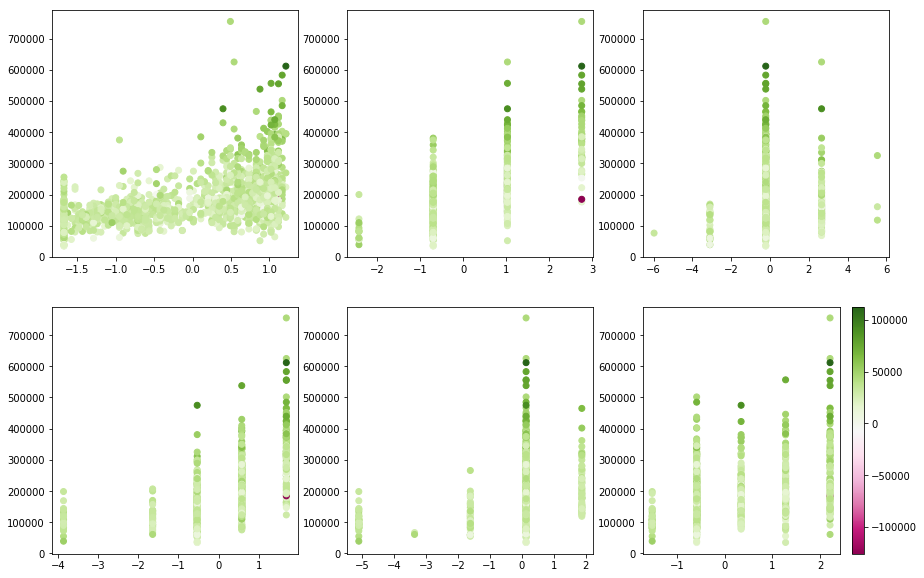

In [28]:
i = 6
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes[0, 0].scatter(X_filted.iloc[:,i+0],y_filted  , c=error_filted, cmap=cm)
axes[0, 1].scatter(X_filted.iloc[:,i+1],y_filted  , c=error_filted, cmap=cm)
axes[0, 2].scatter(X_filted.iloc[:,i+2],y_filted , c=error_filted, cmap=cm)
axes[1, 0].scatter(X_filted.iloc[:,i+3],y_filted  , c=error_filted, cmap=cm)
axes[1, 1].scatter(X_filted.iloc[:,i+4],y_filted  , c=error_filted, cmap=cm)
axes[1, 2].scatter(X_filted.iloc[:,i+5],y_filted  , c=error_filted, cmap=cm)
plt.colorbar(sc)

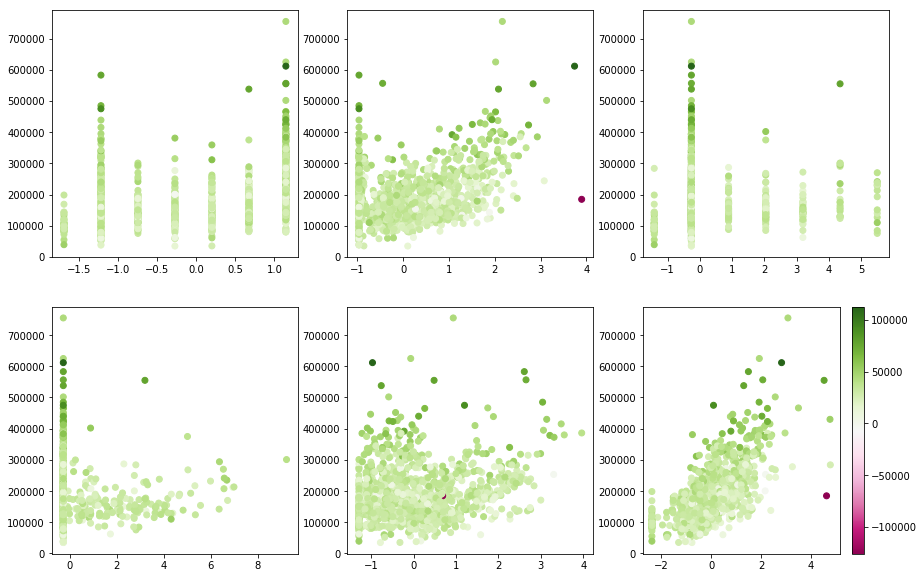

In [29]:
i = 12
fig, axes = plt.subplots(2, 3, figsize=(15,10))
axes[0, 0].scatter(X_filted.iloc[:,i+0],y_filted  , c=error_filted, cmap=cm)
axes[0, 1].scatter(X_filted.iloc[:,i+1],y_filted  , c=error_filted, cmap=cm)
axes[0, 2].scatter(X_filted.iloc[:,i+2],y_filted , c=error_filted, cmap=cm)
axes[1, 0].scatter(X_filted.iloc[:,i+3],y_filted  , c=error_filted, cmap=cm)
axes[1, 1].scatter(X_filted.iloc[:,i+4],y_filted  , c=error_filted, cmap=cm)
axes[1, 2].scatter(X_filted.iloc[:,i+5],y_filted  , c=error_filted, cmap=cm)
plt.colorbar(sc)

In [30]:
# find some outliers in feature BsmtFinSF1
import heapq
print(heapq.nlargest(3, X_filted.iloc[:,13])) 

[3.8974066763514945, 3.7424466786490984, 3.131215576600758]


In [31]:
X_filted.columns[13]

'BsmtFinSF1'

Text(0,0.5,'y_test_pred')

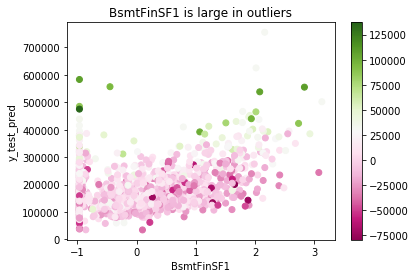

In [33]:
# remove according to BsmtFinSF1. 
X_filted2 = X_filted[X_filted['BsmtFinSF1'] < 3.6]
y_filted2 = y_filted[X_filted['BsmtFinSF1'] < 3.6]
error_filted2 = error_filted[X_filted['BsmtFinSF1'] < 3.6]
cm = plt.cm.get_cmap('PiYG')
sc = plt.scatter(X_filted2.iloc[:,13],y_filted2 , c=error_filted2, cmap=cm) # LotFrontage:
                                                                    #Linear feet of street connected to property
plt.colorbar(sc)
plt.title('BsmtFinSF1 is large in outliers')
plt.xlabel('BsmtFinSF1')
plt.ylabel('y_test_pred')

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X_filted2, y_filted2, test_size=0.3, random_state=42)

parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}

ls = Lasso(random_state=42)

clf = GridSearchCV(ls, parameters, cv=5)

clf.fit(X_train,y_train)

y_test_pred = clf.predict(X_test)

y_train_pred = clf.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)

sqrt(mse)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

25183.600856565372

## After remove the outliers in X , the root mean squared error droped to 25183.60

In [46]:
y_filted.shape[0]-y_filted2.shape[0] # 2 data points removed

2

Text(0,0.5,'y_test_pred')

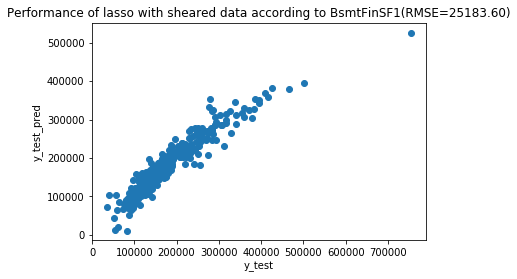

In [47]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of lasso with sheared data according to BsmtFinSF1(RMSE=25183.60)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

## fit into Ridge

In [48]:
parameters = { 'max_iter':[1000,2000,5000],'alpha':[1, 10,100,1000,10000]}
from sklearn.linear_model import Ridge
ls = Ridge(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

In [49]:
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test)

26037.908039527552

In [50]:
clf.best_score_

0.8699814937005034

Text(0,0.5,'y_test_pred')

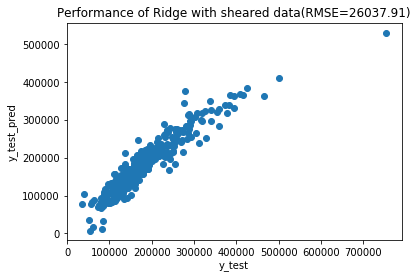

In [51]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of Ridge with sheared data(RMSE=26037.91)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

## log transfered y

Text(0.5,1,'Distribution of log transfered y')

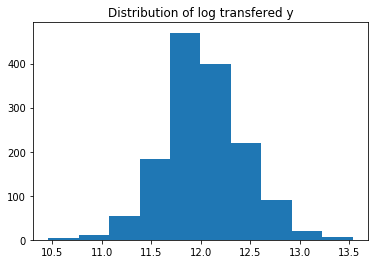

In [52]:
# log transfered y
y_log = np.log(y)
plt.hist(y_log)
plt.title('Distribution of log transfered y')

## fit into lasso

In [58]:

X_train, X_test, y_train, y_test = train_test_split(X, y_log, test_size=0.3, random_state=42)

clf = Lasso(random_state=42)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

mse = mean_squared_error(y_test, y_test_pred)
sqrt(mse)

0.18036476431273618

In [63]:
parameters = { 'max_iter':[100,500,1000],'alpha':[0.001,0.01,0.1,1, 10,100,1000]}
ls = Lasso(random_state=42)
clf = GridSearchCV(ls, parameters, cv=5)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:492: ConvergenceWarning: Objectiv

In [64]:
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test) 

0.18036476431273618

In [65]:
clf.best_params_

{'alpha': 1, 'max_iter': 500}

In [66]:
clf.best_score_

0.6492490027698465

Text(0,0.5,'y_test_pred')

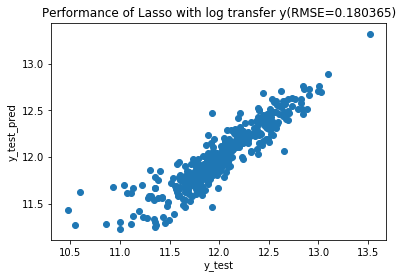

In [68]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of Lasso with log transfer y(RMSE=0.180365)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

## fit into Ridge

In [69]:
parameters = { 'max_iter':[10,50,100,500],'alpha':[0.001,0.01,0.1,1, 10,100,1000]}
rg = Ridge(random_state=42)
clf = GridSearchCV(rg, parameters, cv=5)
clf.fit(X_train,y_train)
y_test_pred = clf.predict(X_test)
y_train_pred = clf.predict(X_train)

/Users/fanwenyu/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Text(0,0.5,'y_test_pred')

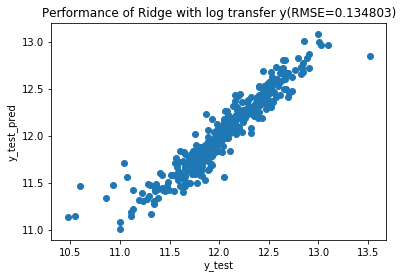

In [70]:
plt.scatter(y_test, y_test_pred)
plt.title('Performance of Ridge with log transfer y(RMSE=0.134803)')
plt.xlabel('y_test')
plt.ylabel('y_test_pred')

In [71]:
mse_test = mean_squared_error(y_test, y_test_pred)
sqrt(mse_test) 

0.1375474209000953

In [72]:
clf.best_score_

0.6234102765983629